# Introduction - Deep Learning

Classical programming is all about creating a function that helps us to process input data and get the desired output.

In the learning paradigm, we change the process so that given a set of examples of input data and desired output, we aim to learn the function that can process the data.

- In machine learning, we end up handcrafting the features and then learn the function to get the desired output
- In deep learning, we want to both learn the features and the function together to get the desired output

![Learning Paradigm](../Slides/img/learning_paradigm.png)

# Theory of Deep Learning

We will start with why deep learning works and explain the basis of Universal Approximation

Let us take a non-linear function - a saddle function

$$ Z = 2X^2 - 3Y^2  + 1 + \epsilon $$

## Problem: A Noisy Function

In [12]:
import sys
sys.path.append("../")

In [13]:
# DL & Numerical Library
import numpy as np
import keras

# Visualisation Library & Helpers
import matplotlib.pyplot as plt
%matplotlib inline
from reco import vis

In [14]:
x = np.arange(-1,1,0.01)
y = np.arange(-1,1,0.01)

In [15]:
X, Y = np.meshgrid(x, y)
c = np.ones((200,200))
e = np.random.rand(200,200)*0.1

In [16]:
Z = 2*X*X - 3*Y*Y + 5*c + e

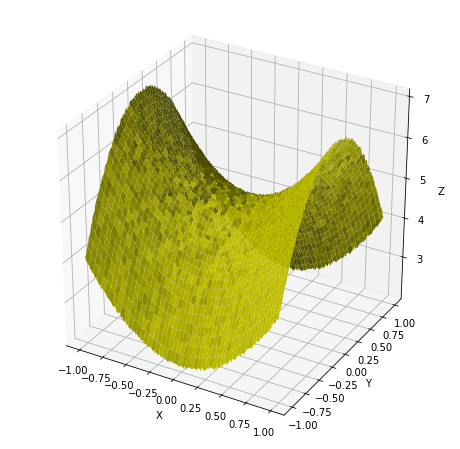

In [17]:
vis.plot3d(X,Y,Z)

## Using Neural Network

### Step 0: Load the Keras Model

In [18]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Concatenate

### Step 1: Create the input and output

In [19]:
input_xy = np.c_[X.reshape(-1),Y.reshape(-1)]
output_z = Z.reshape(-1)

In [20]:
input_x = X.reshape(-1)
input_y = Y.reshape(-1)

In [21]:
output_z.shape, input_xy.shape

((40000,), (40000, 2))

### Step 2: Create the Transformation & Prediction Model

In [39]:
def dl_model(): 
    x_input = Input(shape=[1], name='X')
    y_input = Input(shape=[1], name="Y")
    xy_input = Concatenate(name="Concat")([x_input, y_input])
    Dense_1 = Dense(32, activation="relu", name="Dense1")(xy_input)
    Dense_2 = Dense(4, activation="relu", name="Dense2")(Dense_1)
    z_output = Dense(1, name="Z")(Dense_2)

    model = Model([x_input, y_input], z_output)
    
    model.compile(loss='mean_squared_error', optimizer="sgd", metrics=["mse"])
    
    return model

In [40]:
model = dl_model()

In [41]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
X (InputLayer)                  (None, 1)            0                                            
__________________________________________________________________________________________________
Y (InputLayer)                  (None, 1)            0                                            
__________________________________________________________________________________________________
Concat (Concatenate)            (None, 2)            0           X[0][0]                          
                                                                 Y[0][0]                          
__________________________________________________________________________________________________
Dense1 (Dense)                  (None, 32)           96          Concat[0][0]               

### Step 3: Compile the Model - Loss, Optimizer and Fit the Model

In [42]:
model.compile(loss='mean_squared_error', optimizer="sgd", metrics=["mse"])

In [44]:
%%time
output = model.fit([input_x, input_y], output_z, epochs=10, validation_split=0.2, shuffle=True, verbose=1)



Train on 32000 samples, validate on 8000 samples
Epoch 1/10
32000/32000 [==============================] - 1s 34us/step - loss: 0.2778 - mean_squared_error: 0.2778 - val_loss: 1.0657 - val_mean_squared_error: 1.0657
Epoch 2/10
32000/32000 [==============================] - 1s 26us/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.6938 - val_mean_squared_error: 0.6938
Epoch 3/10
32000/32000 [==============================] - 1s 26us/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.5357 - val_mean_squared_error: 0.5357
Epoch 4/10
32000/32000 [==============================] - 1s 26us/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.4700 - val_mean_squared_error: 0.4700
Epoch 5/10
32000/32000 [==============================] - 1s 26us/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.4103 - val_mean_squared_error: 0.4103
Epoch 6/10
32000/32000 [==============================] - 1s 26us/step - loss: 0.0024 - mean_squared_error: 0.0024

### Step 4: Evaluate Model Performance

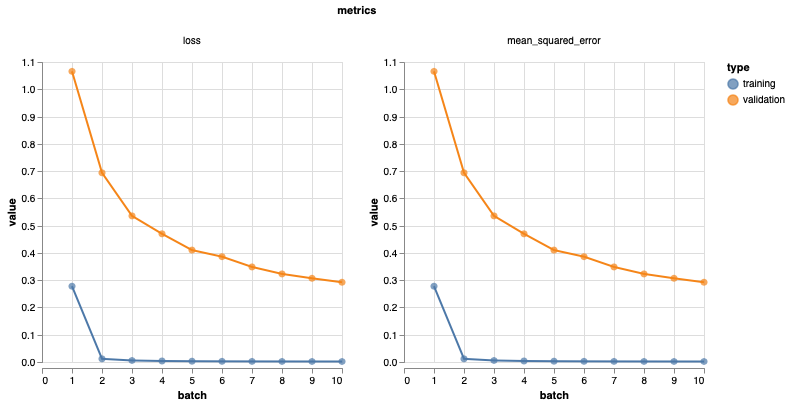

In [45]:
vis.metrics(output.history)

### Step 5: Make Prediction from the model

In [47]:
Z_pred = model.predict([input_x, input_y]).reshape(200,200)

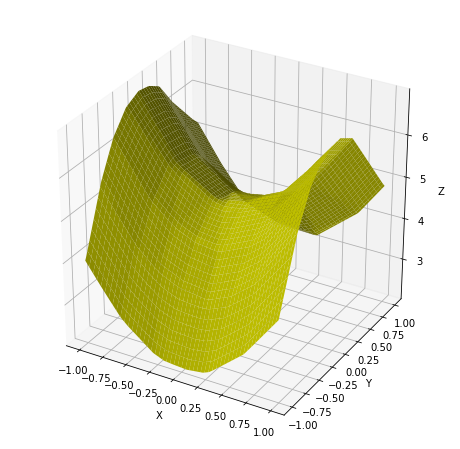

In [48]:
vis.plot3d(X,Y,Z_pred)

## Experimentation / Questions

- Try changing the activation to a "linear" and see whether you can predict the function or not 
- Try adding more layers to the network
- Try changing the number of layers in the network